# Binary Classification with PCA

## 1. Reading Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('E:/PGP-DSE/Capstone Project/Group 2/OnlineNewsPopularity')

from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings

In [7]:
df = pd.read_csv('ONPClass.csv')

In [8]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,class
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [9]:
df = df.drop(['url','timedelta'],axis=1)

# Importing libraries required for building models

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.model_selection import GridSearchCV, validation_curve,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score,roc_auc_score,roc_curve

## PART A -  Applying PCA on whole data

#### Custom functions

In [35]:
# function to standardize the data
def std_all_data(x):
    sc = StandardScaler()
    scaled = sc.fit_transform(x)
    return scaled

# function to obtain PC's
def get_principal_comp(x_scaled):
    # Perfroming the PCA
    pca = PCA()
    pca.fit(x_scaled)

    # Apply dimensionality reduction
    pc_score = pca.transform(x_scaled)

    # explained variance in percentage
    exp_var = pca.explained_variance_ratio_

    exp_var = np.round(exp_var*100,decimals=1)

    cum_var=np.cumsum(exp_var)

    ncomp = len(cum_var[cum_var<95])
    
    labels = ['PC' + str(x) for x in range(1,len(exp_var)+1)]
    
    # scree plot 
    plt.figure(figsize=(20,5))
    plt.bar(x = range(1,len(exp_var)+1), height=exp_var,tick_label=labels)
    plt.xlabel('No. of  Components')
    plt.ylabel('percentage of explained variance')
    plt.title('Scree Plot')
    plt.xticks(rotation=90)
    plt.show()
    
    # Components vs Variance
    plt.figure(figsize = (5,5))
    plt.plot(cum_var)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.title('Components vs Variance')
    plt.show()

    print('95% variance is explanied by {} PCs'.format(ncomp))
    
    return ncomp

# function to apply PCA
def apply_pca(n,x_scaled):
    pca = PCA(n_components = n)
    data = pca.fit_transform(x_scaled)
    return data

# function for applying grid search cv
def grid_search_cv(x,y,model,params):
    GS = GridSearchCV(model, params, cv = 5, scoring = 'roc_auc')
    GS.fit(x,y)
    return GS.best_params_, GS.best_estimator_, GS.best_score_

# function for applying random search cv
def random_search_cv(x,y,model,params):
    RS = RandomizedSearchCV(model, params, cv = 5, scoring = 'roc_auc', random_state = 0)
    RS.fit(x,y)
    return RS.best_params_, RS.best_estimator_, RS.best_score_


final = {}
results = []
names = []
auc = []

# function to apply cross validation on models build 
def implement_cv(x,y,models):
    for name,model in models:
        kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
        cv_results = model_selection.cross_val_score(model,x,y,cv=kfold, scoring='roc_auc')
        results.append((np.abs(cv_results)))
        auc.append(np.mean(results))
        names.append(name)


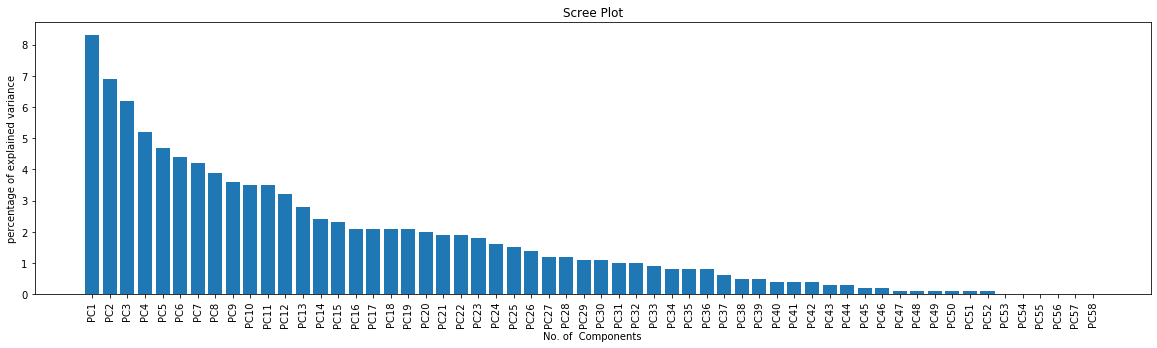

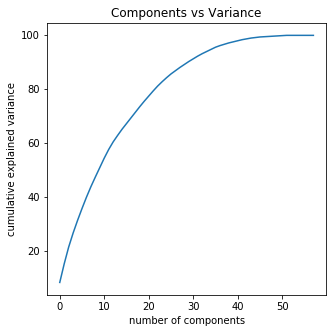

95% variance is explanied by 35 PCs


In [36]:
X = df.drop(['class'], axis = 1 )

Y = df['class']

X_scaled = std_all_data(X) # scale data

ncomp = get_principal_comp(X_scaled) # obtain principal components

pca_data = apply_pca(ncomp,X_scaled) # apply pca on data

## Initialize and build the models


### 1. Logistic Regression

In [37]:

LOGREG = LogisticRegression(random_state = 0, max_iter = 1000)

models = []
models.append(('Logistic Regression',LOGREG))

implement_cv(pca_data,Y,models) # function call to fit the model with default parameters
print(names,auc)

['Logistic Regression'] [0.6927323804737174]


### 2. Decision Tree

In [38]:
DT = DecisionTreeClassifier(random_state=0)

models = []
models.append(('Decision Tree', DT))

implement_cv(pca_data,Y,models)
print(names,auc)

['Logistic Regression', 'Decision Tree'] [0.6927323804737174, 0.6262649121836266]


## Ensemble methods

### 3. Random Forest

In [39]:
RF = RandomForestClassifier(random_state=0)

models = []
models.append(('Random Forest', RF))

implement_cv(pca_data,Y,models)

### 4. AdaBoost DT

In [40]:
AB_DT = AdaBoostClassifier(base_estimator = DT, random_state=0)

models = []
models.append(('AB Decision Tree', DT))

implement_cv(pca_data,Y,models)

### 5. AdaBoost RF

In [41]:
AB_RF = AdaBoostClassifier(base_estimator = RF, random_state=0)

models = []
models.append(('AB Random Forest', AB_RF))

implement_cv(pca_data,Y,models)

### 6. Gradient Boost 

In [42]:
GB = GradientBoostingClassifier(random_state=0)

models = []
models.append(('Gradient Boost', GB))

implement_cv(pca_data,Y,models)

### 7. XGBoost

In [79]:
XGB = XGBClassifier(random_state=0)

models = []
models.append(('XGBoost', XGB))

implement_cv(pca_data,Y,models)

## Hyper Parameter Tuning - Random Search CV

### Tuning Decision Tree

In [44]:
# Maximum number of levels in tree
max_depth = np.arange(2,9,2)

# Minimum number of samples required to split a node
min_samples_split = [2,3,5,7]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4,5]

dt_params = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf,
             'criterion':['gini','entropy'], 'min_samples_split' : min_samples_split}

dtparam, dtestimator, dtscore = random_search_cv(pca_data,Y,DT,dt_params)

print('Best Parameters for Decision Tree:\n',dtparam)

Best Parameters for Decision Tree:
 {'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 8, 'criterion': 'entropy'}


### 7. Tuned Decision Tree

In [45]:
models = []
models.append(('Tuned Decision Tree', dtestimator))

implement_cv(pca_data,Y,models)

## Ensemble Models with Tuned Parameters

### Tuning Random Forest

In [46]:
# Number of trees in random forest
n_estimators = [10,15,20,25]

# Maximum number of levels in tree
max_depth =  np.arange(2,9,2)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4, 5]


rf_params = {'n_estimators': n_estimators, 'criterion':['gini','entropy'], 
             'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split }

rfparam, rfestimator, rfscore = random_search_cv(pca_data,Y,RF,rf_params)

print('Best Parameters for Random Forest:\n',rfparam)

Best Parameters for Random Forest:
 {'n_estimators': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'gini'}


### 8. Tuned Random Forest

In [47]:
models = []
models.append(('Tuned Random Forest', rfestimator))

implement_cv(pca_data,Y,models)

### 9. Tuned RF with AdaBoost

In [49]:
tuned_RF = rfestimator

tuned_AB_RF = AdaBoostClassifier(base_estimator = tuned_RF, n_estimators = 15, random_state = 0)

models = []
models.append(('AdaBoost Tuned RF', tuned_AB_RF))

implement_cv(pca_data,Y,models)

### 10. Tuned DT with AdaBoost

In [50]:
tuned_DT = dtestimator

tuned_AB_DT = AdaBoostClassifier(base_estimator = tuned_DT, n_estimators = 15, random_state = 0)

models = []
models.append(('AdaBoost Tuned DT', tuned_AB_DT))

implement_cv(pca_data,Y,models)

## Model Comparison

In [84]:
names = ['Logistic Regression',
 'Decision Tree',
 'Random Forest',
 'AdaBoost Decision Tree',
 'AdaBoost Random Forest',
 'Gradient Boost',
 'Tuned Decision Tree',
 'Tuned Random Forest',
 'AdaBoost Tuned RF',
 'AdaBoost Tuned DT','XGBoost']

auc = [0.6927323804737174,
 0.6262649121836266,
 0.6500154501451564,
 0.6274609485822513,
 0.6416503720952582,
 0.65129045361935,
 0.6524598413518591,
 0.6566629656149784,
 0.6613121610487015,
 0.6582582121415567,0.6605]

final.update({'Model':names , 'auc_score': auc})
pd.DataFrame(final)

,Model,auc_score
0,Logistic Regression,0.692732
1,Decision Tree,0.626265
2,Random Forest,0.650015
3,AdaBoost Decision Tree,0.627461
4,AdaBoost Random Forest,0.641650
5,Gradient Boost,0.651290
6,Tuned Decision Tree,0.652460
7,Tuned Random Forest,0.656663
8,AdaBoost Tuned RF,0.661312
9,AdaBoost Tuned DT,0.658258


## Inference: 

The Logistic Regression perfroms well as compared to others with an roc_auc_score of 69.27% on PCA data

tuned Random forest with AdaBoost has a score 66.13%

## PART B - Applying PCA on Train and Test sets

#### Custom Functions

In [58]:

# function for splitting the data in train and validation set
def perform_train_test_split(x,y):
    return train_test_split(x, y, test_size=0.2, random_state = 0)


# function for scaling the data
def std_data(xtrain,xtest):
    sc = StandardScaler()
    scaled = sc.fit(xtrain)
    scaled_train = sc.transform(xtrain)
    scaled_test = sc.transform(xtest)
    return scaled_train, scaled_test



# function to Apply PCA on train and test sets
def get_pc(train,test):
    
    # Perfroming the PCA
    pca = PCA(0.95)
    pca.fit(train)

    # Apply dimensionality reduction - PCA to standardized X and get the principal components
    pca_train = pca.transform(train)
    pca_test = pca.transform(test)
    
    # explained variance in percentage i.e (4.68/45)
    exp_var = pca.explained_variance_ratio_

    exp_var = np.round(exp_var*100,decimals=1)

    cum_var=np.cumsum(exp_var)
 
    print('No. of Components: ',len(cum_var[cum_var<95]))
    
    return pca_train, pca_test

train_score = []
test_score = []
names = []


# function to get roc_auc_scores for train and test  
def fit_predict_plot(pca_train,pca_test,y_train,y_test,models):
    
    for name, model in models:
        
        model.fit(pca_train,y_train)
        
        y_pred_train = model.predict(pca_train)
        y_pred_test = model.predict(pca_test)
        
        probas_train = model.predict_proba(pca_train)[:,1]
        probas_test = model.predict_proba(pca_test)[:,1]
    
        train_score.append(roc_auc_score(y_train,probas_train))
        test_score.append(roc_auc_score(y_test,probas_test))
        names.append(name)

        get_metrics(y_train,y_test,y_pred_train,y_pred_test)
        
        plot_roc_auc_curve(probas_train,probas_test,y_train,y_test,name)
        
        
        
# function to plot the roc auc curve
def plot_roc_auc_curve(probas_train,probas_test,y_train,y_test,name):
    
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train,probas_train)

        fpr_test, tpr_test, thresholds_test = roc_curve(y_test,probas_test)

        
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
        plt.plot(fpr_train, tpr_train, color='b', 
                 label=r'Train ROC (AUC = %0.2f )' % (roc_auc_score(y_train,probas_train)),lw=2, alpha=.5)
        plt.plot(fpr_test, tpr_test, color='g', 
                 label=r'Test ROC (AUC = %0.2f )' % (roc_auc_score(y_test,probas_test)),lw=2, alpha=.8)

        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate',fontsize=10)
        plt.ylabel('True Positive Rate',fontsize=10)
        plt.title('ROC of %s' % (name),fontsize=10)
        plt.legend(loc="lower right", prop={'size': 9})
        plt.show()


def get_metrics(y_train,y_test,y_pred_train,y_pred_test):
        print('For Train Data:\n')
        print(confusion_matrix(y_train,y_pred_train))
        print(classification_report(y_train,y_pred_train))
        
        print('For Test Data:\n')
        print(confusion_matrix(y_test,y_pred_test))
        print(classification_report(y_test,y_pred_test))
        
        
# function for finding best parameters using RandomizedSearchCV  
def random_search_cv(x,y,model,params):
    RS = RandomizedSearchCV(model, params, cv = 5, scoring = 'roc_auc',random_state = 0)
    RS.fit(x,y)
    return RS.best_params_, RS.best_estimator_, RS.best_score_


# function for finding best parameters using GridSearchCV
def grid_search_cv(x,y,model,params):
    GS = GridSearchCV(model, params, cv = 5, scoring = 'roc_auc')
    GS.fit(x,y)
    return GS.best_params_, GS.best_estimator_, GS.best_score_



# function to get roc_auc_score for each model using cross validation
def implement(x,y,models):
    final = {}
    results = []
    names = []
    auc = []
    for name,model in models:
        kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
        cv_results = model_selection.cross_val_score(model,x,y,cv=kfold, scoring='roc_auc')
        results.append((np.abs(cv_results)))
        auc.append(np.mean(results))
        names.append(name)
        final.update({'Model':names , 'auc_score': auc})
    return pd.DataFrame(final)



## Splitting the data into train and validation sets


In [59]:

X = df.drop(['class','avg_negative_polarity','min_negative_polarity','max_negative_polarity',
             'abs_title_subjectivity','weekday_is_friday'], axis = 1 )

Y = df['class']

X_train, X_test, y_train, y_test = perform_train_test_split(X,Y) # split

scaled_train, scaled_test = std_data(X_train,X_test)    # standardize data

pca_train, pca_test = get_pc(scaled_train,scaled_test)  # apply pca

No. of Components:  32


## Initializing and Model Building

### 1. Logistic Regression

For Train Data:

[[10603  5424]
 [ 5875  9813]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65     16027
           1       0.64      0.63      0.63     15688

    accuracy                           0.64     31715
   macro avg       0.64      0.64      0.64     31715
weighted avg       0.64      0.64      0.64     31715

For Test Data:

[[2667 1388]
 [1486 2388]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      4055
           1       0.63      0.62      0.62      3874

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929



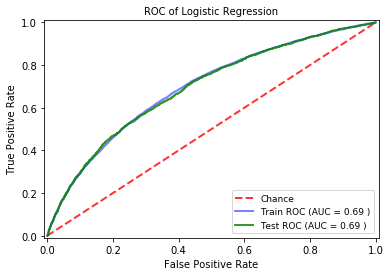

In [60]:
LOGREG = LogisticRegression(random_state = 0, max_iter = 1000)

models = []
models.append(('Logistic Regression',LOGREG))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)

### 2. Descision Tree

For Train Data:

[[16027     0]
 [    0 15688]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16027
           1       1.00      1.00      1.00     15688

    accuracy                           1.00     31715
   macro avg       1.00      1.00      1.00     31715
weighted avg       1.00      1.00      1.00     31715

For Test Data:

[[2272 1783]
 [1688 2186]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      4055
           1       0.55      0.56      0.56      3874

    accuracy                           0.56      7929
   macro avg       0.56      0.56      0.56      7929
weighted avg       0.56      0.56      0.56      7929



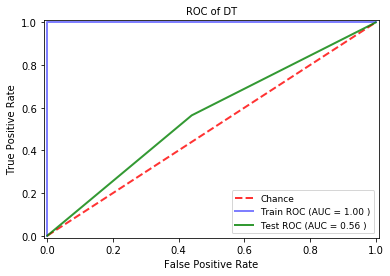

In [61]:
DT = DecisionTreeClassifier(random_state = 0)

models = []
models.append(('DT', DT))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)


## Ensemble Models

### 3. Random Forest

For Train Data:

[[16027     0]
 [    0 15688]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16027
           1       1.00      1.00      1.00     15688

    accuracy                           1.00     31715
   macro avg       1.00      1.00      1.00     31715
weighted avg       1.00      1.00      1.00     31715

For Test Data:

[[2687 1368]
 [1408 2466]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      4055
           1       0.64      0.64      0.64      3874

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



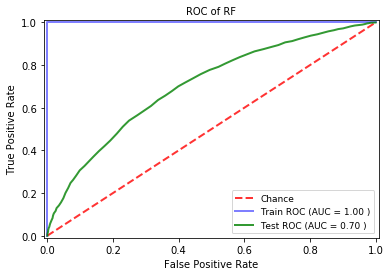

In [62]:
RF = RandomForestClassifier(random_state = 0)

models = []
models.append(('RF', RF))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)

### 4. AdaBoost RF

For Train Data:

[[16027     0]
 [    0 15688]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16027
           1       1.00      1.00      1.00     15688

    accuracy                           1.00     31715
   macro avg       1.00      1.00      1.00     31715
weighted avg       1.00      1.00      1.00     31715

For Test Data:

[[2679 1376]
 [1469 2405]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      4055
           1       0.64      0.62      0.63      3874

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929



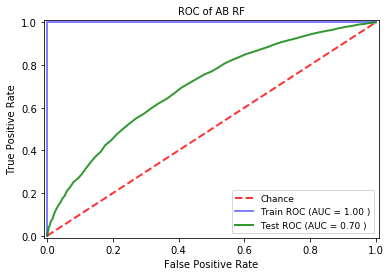

In [65]:
AB_RF = AdaBoostClassifier(base_estimator = RF, n_estimators = 20, random_state = 0)

models = []
models.append(('AB RF', AB_RF))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)

### 5. Adaboost DT

For Train Data:

[[16027     0]
 [    0 15688]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16027
           1       1.00      1.00      1.00     15688

    accuracy                           1.00     31715
   macro avg       1.00      1.00      1.00     31715
weighted avg       1.00      1.00      1.00     31715

For Test Data:

[[2280 1775]
 [1697 2177]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      4055
           1       0.55      0.56      0.56      3874

    accuracy                           0.56      7929
   macro avg       0.56      0.56      0.56      7929
weighted avg       0.56      0.56      0.56      7929



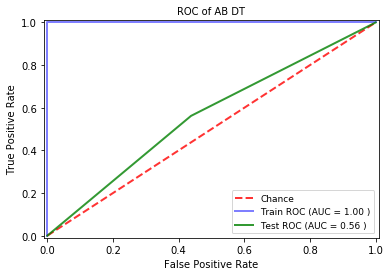

In [66]:
AB_DT = AdaBoostClassifier(base_estimator = DT, n_estimators = 10, random_state = 0)

models = []
models.append(('AB DT', AB_DT))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)

### 6. Gradient Boost

For Train Data:

[[10225  5802]
 [ 5779  9909]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64     16027
           1       0.63      0.63      0.63     15688

    accuracy                           0.63     31715
   macro avg       0.63      0.63      0.63     31715
weighted avg       0.63      0.63      0.63     31715

For Test Data:

[[2510 1545]
 [1484 2390]]
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      4055
           1       0.61      0.62      0.61      3874

    accuracy                           0.62      7929
   macro avg       0.62      0.62      0.62      7929
weighted avg       0.62      0.62      0.62      7929



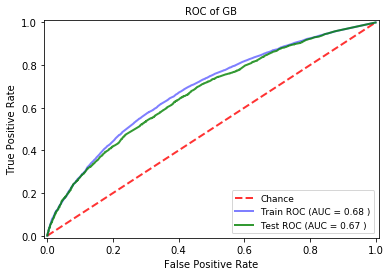

In [67]:
GB = GradientBoostingClassifier(n_estimators = 10, random_state = 0)

models = []
models.append(('GB', GB))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)

## Hyper Parameter tuning - Randomized Search CV

### Tuning Decision Tree

In [68]:
# Maximum number of levels in tree
max_depth = np.arange(2,9,2)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4,5]

dt_params = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf,
             'criterion':['gini','entropy'], 'min_samples_split' : min_samples_split}

dtparam, dtestimator, dtscore = random_search_cv(pca_train,y_train,DT,dt_params)

print(dtparam)

{'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 8, 'criterion': 'entropy'}


### 7. Tuned DT

For Train Data:

[[10531  5496]
 [ 5354 10334]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     16027
           1       0.65      0.66      0.66     15688

    accuracy                           0.66     31715
   macro avg       0.66      0.66      0.66     31715
weighted avg       0.66      0.66      0.66     31715

For Test Data:

[[2461 1594]
 [1523 2351]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      4055
           1       0.60      0.61      0.60      3874

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



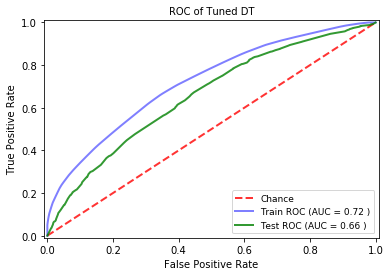

In [69]:
models = []
models.append(('Tuned DT', dtestimator))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)

## Ensemble Models with tuned parameters

### Tuning Random Forest

In [70]:
# Number of trees in random forest
n_estimators = np.arange(10,40,10)

# Maximum number of levels in tree
max_depth =  np.arange(2,9,2)
#[int(x) for x in np.linspace(3, 30, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4, 5]


rf_params = {'n_estimators': n_estimators, 'criterion':['gini','entropy'], 
             'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split }

rfparam, rfestimator, rfscore = random_search_cv(pca_train,y_train,RF,rf_params)

print(rfparam)

{'n_estimators': 30, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'gini'}


### 8. Tuned Random Forest

For Train Data:

[[11521  4506]
 [ 5157 10531]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70     16027
           1       0.70      0.67      0.69     15688

    accuracy                           0.70     31715
   macro avg       0.70      0.70      0.70     31715
weighted avg       0.70      0.70      0.70     31715

For Test Data:

[[2682 1373]
 [1488 2386]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      4055
           1       0.63      0.62      0.63      3874

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929



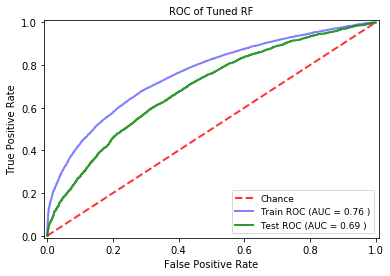

In [71]:
models = []
models.append(('Tuned RF', rfestimator))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)

### 9. AdaBoost Tuned RF 

For Train Data:

[[13634  2393]
 [ 3290 12398]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     16027
           1       0.84      0.79      0.81     15688

    accuracy                           0.82     31715
   macro avg       0.82      0.82      0.82     31715
weighted avg       0.82      0.82      0.82     31715

For Test Data:

[[2702 1353]
 [1410 2464]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      4055
           1       0.65      0.64      0.64      3874

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



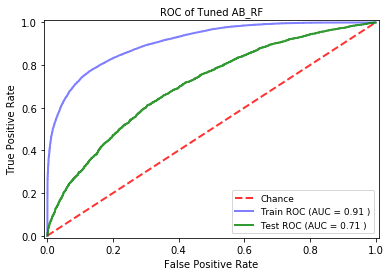

In [72]:
tuned_RF = rfestimator
tuned_AB_RF = AdaBoostClassifier(base_estimator = tuned_RF, n_estimators = 10, random_state = 0)

models = []
models.append(('Tuned AB_RF', tuned_AB_RF))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)

### 10. AdaBoost Tuned DT

For Train Data:

[[12507  3520]
 [ 4088 11600]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77     16027
           1       0.77      0.74      0.75     15688

    accuracy                           0.76     31715
   macro avg       0.76      0.76      0.76     31715
weighted avg       0.76      0.76      0.76     31715

For Test Data:

[[2592 1463]
 [1620 2254]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      4055
           1       0.61      0.58      0.59      3874

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



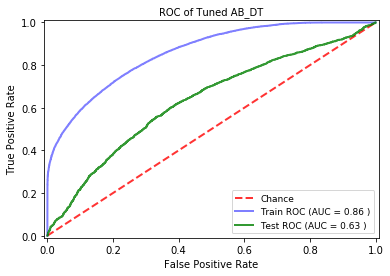

In [73]:
tuned_DT = dtestimator
tuned_AB_DT = AdaBoostClassifier(base_estimator = tuned_DT, n_estimators = 10, random_state = 0)

models = []
models.append(('Tuned AB_DT', tuned_AB_DT))

fit_predict_plot(pca_train,pca_test,y_train,y_test,models)

## Model Comparison

In [75]:
scores = pd.DataFrame({'Model': names, 'train_score': train_score, 'test_score': test_score})
scores.sort_values(by='test_score',ascending = False)

,Model,train_score,test_score
10,Tuned AB_RF,0.908579,0.706124
2,RF,1.000000,0.703146
3,AB RF,1.000000,0.699085
5,AB RF,1.000000,0.699085
0,Logistic Regression,0.694659,0.692501
9,Tuned RF,0.760965,0.692121
7,GB,0.683639,0.668582
8,Tuned DT,0.721169,0.656584
11,Tuned AB_DT,0.859071,0.634675
1,DT,1.000000,0.562285


## Inference:

Note: the data is split in the train test ratio of 80:20

Base Model : Logistic Regression with score of 69.25%

The Tuned Random Forest with AdaBoost performs best on test data with a roc auc score of 70.6

Decision performs the worst

## Cross Validation

In [94]:
models = []
#models.append(('Logistic Regression',LOGREG))
#models.append(('Decision Tree', DT))
#models.append(('Random Forest', RF))
#models.append(('AdaBoost DT', AB_DT))
#models.append(('AdaBoost RF', AB_RF))
#models.append(('Gradient Boost', GB))

#models.append(('Tuned Decision Tree', dtestimator))
#models.append(('Tuned Random Forest', rfestimator))

#models.append(('Tuned AdaBoost DT', tuned_AB_DT))
models.append(('Tuned AdaBoost RF', tuned_AB_RF))

# function call to implement the models
implement(pca_train,y_train,models)

,Model,auc_score
0,Tuned AdaBoost RF,0.708952
